# Шаг 1, загрузка картинки и получение выделенных областей с текстом и иная предобработка.

In [4]:
from bb_text_extractor import get_masked_image

from PIL import Image


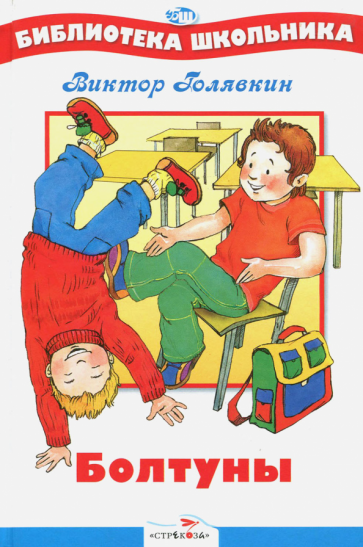

In [5]:
# image = Image.open('pics/1010629.png')
# image = Image.open('pics/32146.png')
image = Image.open("pics/35294.png").convert("RGB")
image


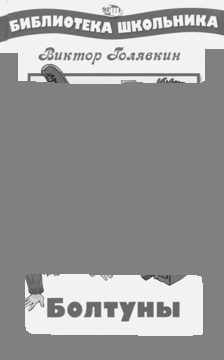

In [6]:
masked_image = get_masked_image(image, mask_padding=25)
masked_image


# Шаг 2, получение текста с картинки.

***необходимо сохранить картинку на диск для загрузки её в ocr***

In [7]:
masked_image.save("test_pic.png")

In [8]:
from yandex_ocr import get_yandex_ocr

In [9]:
text = get_yandex_ocr("test_pic.png").strip().lower().replace("\n", " ")
text


'библиотека школьника виктор болявкин болтуны'

# Шаг 3, исправление опечаток с помощью Mixtral.

In [10]:
from llm import Mixtral, llm

mixtral = Mixtral.from_llm(llm, verbose=False)


In [11]:
res = mixtral.text_normalization(text)
text = res.content.strip().replace("\n", " ")
print(text)


Виктор Болявкин "Болтуны"


# Шаг 4, поиск информации по книге в базе с помощью tf-idf.

In [12]:
from tf_idf_search import cosine_search

In [13]:
row_data = cosine_search(text)
row_data


id                                                         35294
link                        https://www.labirint.ru/books/35294/
name                                    Виктор Голявкин: Болтуны
rate                                                         8.7
description    Рассказы и повесть В. В. Голявкина.Для младшег...
reviews        Двадцать восемь небольших рассказов Виктора Го...
Name: 2475, dtype: object

# Шаг 5, краткий пересказ начала книги и суммаризация отзывов с помощью Mixtral.

In [14]:
description = (
    row_data["description"] if row_data["description"] else "Описание отсутствует"
)

reviews = row_data["reviews"].split(";\n") if row_data["reviews"] else ""


In [15]:
res = mixtral.reviews_summary(description=description, reviews=reviews)
print(res.content)


 Книга "Рассказы и повесть" Виктора Голявкина предназначена для младшего школьного возраста, особенно для детей в возрасте 8-9 лет. Она содержит 28 небольших рассказов, написанных в юмористическом ключе. Книга имеет небольшой формат, с желтоватым шероховатым офсетом и цветными иллюстрациями, не примечательными, но и не отталкивающими. Рассказы просты и понятны, содержат юмор и легкое отношение к жизни.

Читатели отмечают веселый и интересный характер книги, которая понравится детям и поможет им развить любовь к чтению. Несмотря на свою небольшую толщину, книга содержит множество забавных историй, таких как "Катю вызвали отвечать урок, а Маша в окно засмотрелась", "Две шапки", "Как я писал стихи" и "Козел - баран". Книга рекомендуется для чтения вне класса и может стать отличным подарком для детей.

Кроме того, книга отличается доступной ценой и качественным изданием. В ней нет ни запаха баннерной краски, ни дешевых материалов. Книга может быть полезна для развития речи и воображения у 